<a href="https://colab.research.google.com/github/silveriorj/Airbnb-Scraper/blob/master/exerc_cios_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios Perceptron

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from IPython.display import clear_output

## Faça você mesmo #1
Utilizando os pesos do perceptron disponibilizados. Use os pesos para classificar os dados entre a classe positiva (Iris Setosa) e negativa (Iris Versicolour). Se o vetor for da classe positiva, plote em azul com o simbolo + e se o vetor for da classe negativa, plote de vermelho com o marcador o. **Ao fazer o cálculo não esqueça do bias**



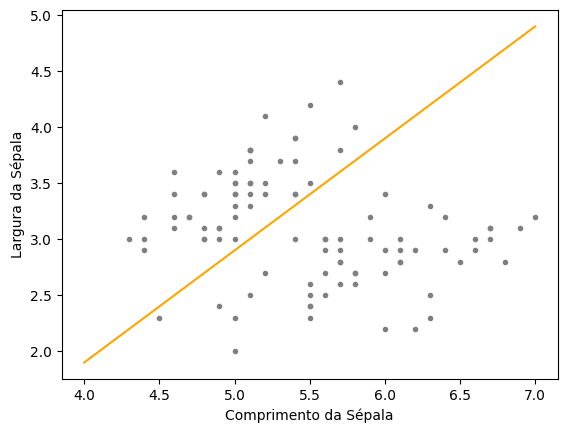

In [ ]:
#Carrega o dataset do sklearn
iris = datasets.load_iris()

# Colocando no Pandas para filtrar
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target

#vamos manter apenas as duas primeiras classes: Iris Setosa e Iris Versicolour
vetores_classe_0 = iris_df[iris_df["target"] == 0]
vetores_classe_1 = iris_df[iris_df["target"] == 1]

#removendo colunas, para deixar o problema bidimensional
remover = ['petal length (cm)', 'petal width (cm)']
vetores_classe_0 = vetores_classe_0.drop(columns = remover)
vetores_classe_1 = vetores_classe_1.drop(columns = remover)

#colocando em um vetor numpy para facilitar
vetores_classe_0 = vetores_classe_0.to_numpy()
vetores_classe_1 = vetores_classe_1.to_numpy()

plt.xlabel("Comprimento da Sépala")
plt.ylabel("Largura da Sépala")

#fronteira de decisão
#vetor de pesos
w =  np.array([2.1,-1,1])

#equação da fronteira, apenas para poder visualizar
x_hiperplano = np.array([4,7])
y_hiperplano = ((x_hiperplano *  1) - 2.1)
plt.plot(x_hiperplano, y_hiperplano, color='orange')

#combinando os vetores em um só
#agora não sabemos o que é Iris Setosa ou Iris Versicolour
#removido também o target
todos = np.concatenate((vetores_classe_0[:,[0,1]], vetores_classe_1[:,[0,1]]))
for x in todos:
  #modifique aqui
  #se o vetor for da classe positiva, plote de azul com marcador +
  #se o vetor for da classe negativa, plote de vermelho com marcador o
  #não esqueça de adicionar o bias em x antes de realizar os cálculos
  plt.plot(x[0], x[1], '.', color='gray')

## Faça você mesmo #1 Reposta
**Atenção abra somente após ter completado o exercício**

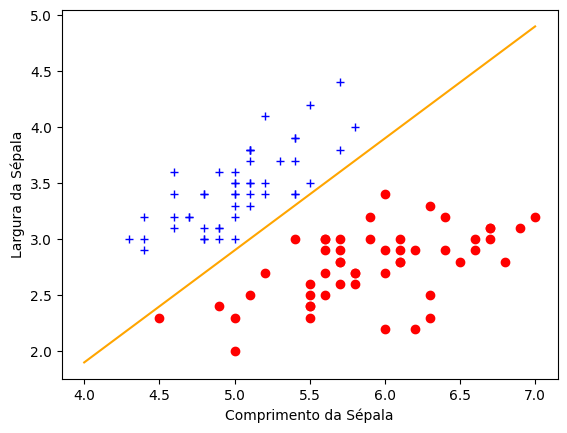

In [ ]:
#Faça você mesmo #1, resposta

#Carga do dataset do repositório do sklearn
iris = datasets.load_iris()


# Colocando no Pandas para filtrar
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target

#vamos manter apenas as duas primeiras classes: Iris Setosa e Iris Versicolour
vetores_classe_0 = iris_df[iris_df["target"] == 0]
vetores_classe_1 = iris_df[iris_df["target"] == 1]


#removendo colunas, para deixar o problema bidimensional
remover = ['petal length (cm)', 'petal width (cm)']
vetores_classe_0 = vetores_classe_0.drop(columns = remover)
vetores_classe_1 = vetores_classe_1.drop(columns = remover)

#colocando em um vetor numpy para facilitar
vetores_classe_0 = vetores_classe_0.to_numpy()
vetores_classe_1 = vetores_classe_1.to_numpy()

plt.xlabel("Comprimento da Sépala")
plt.ylabel("Largura da Sépala")

#fronteira de decisão
#vetor de pesos
w =  np.array([2.1,-1,1])

#equação da fronteira, apenas para poder visualizar
x_hiperplano = np.array([4,7])
y_hiperplano = ((x_hiperplano *  1) - 2.1)
plt.plot(x_hiperplano, y_hiperplano, color='orange')

#combinando os vetores em um só
#agora não sabemos o que é Iris Setosa ou Iris Versicolour
#removido também o target
todos = np.concatenate((vetores_classe_0[:,[0,1]], vetores_classe_1[:,[0,1]]))

for x in todos:
  x_bias = np.append(1, x)
  prod_escalar = w.dot(x_bias)
  if prod_escalar >= 0:
    #classificado como Iris Setosa
    plt.plot(x[0], x[1], '+', color='blue')
  else:
    #classificado como Iris Versicolour
    plt.plot(x[0], x[1], 'o', color='red')

## Faça você mesmo #2

Dado o que foi visto em aula implemente o algoritmo de treinamento para o perceptron. Utilize função imprimir_plano para plotar a fronteira de decisão criada a cada momento do treino.

In [ ]:
# Função imprimir o plano atual
def imprimir_plano(vetores, w, bias, incorretos = None):
    clear_output(wait=True)
    plt.figure()

    plt.xlim(-1, 2)
    plt.ylim(-1, 2)

    y_hiperplano = (((x_hiperplano *  -1*w[0]) - bias )/w[1]) #cuidado, pode dar divisão por zero!
    plt.plot(x_hiperplano, y_hiperplano, color='orange')
    plt.quiver(0,0, w[0], w[1], color=['b'], angles='xy', scale_units='xy', scale=1)

    for x in vetores:
      if x[2] == -1: #Iris Setosa
        plt.plot(x[0], x[1], 'o', color='red')
      else: #Iris Versicolour
        plt.plot(x[0], x[1], '+', color='blue')
    if incorretos is not None:
      for x in incorretos:
        plt.plot(x[0], x[1], '2', color='black')
    plt.show()
    return

In [ ]:
#Faça você mesmo #2
from sklearn.preprocessing import MinMaxScaler

#Carga do dataset do repositório do sklearn
iris = datasets.load_iris()

# Colocando no Pandas para filtrar
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target

scaler = MinMaxScaler()

# Normalizando características
iris_df[iris.feature_names] = scaler.fit_transform(iris_df[iris.feature_names])

#vamos manter apenas as duas primeiras classes: Iris Setosa e Iris Versicolour
vetores_classe_0 = iris_df[iris_df["target"] == 0]
vetores_classe_1 = iris_df[iris_df["target"] == 1]


#removendo colunas, para deixar o problema bidimensional
remover = ['petal length (cm)', 'petal width (cm)']
vetores_classe_0 = vetores_classe_0.drop(columns = remover)
vetores_classe_1 = vetores_classe_1.drop(columns = remover)

#ajustando classes para operar com o perceptron
vetores_classe_0["target"] = - 1
vetores_classe_1["target"] = + 1

#colocando em um vetor numpy para facilitar
vetores = np.concatenate((vetores_classe_0.to_numpy(), vetores_classe_1.to_numpy()))
np.random.seed(42)
np.random.shuffle(vetores) #misturando as linhas

#Valores x da fronteira, apenas para poder visualizar
x_hiperplano = np.array([-1,2])

#chute inicial. No mundo real, seria aleatório
w =  np.array([1,-1])
bias = 1
eta = 0.1

#Implemente aqui o algoritmo de treinamento

NameError: name 'datasets' is not defined